In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np

In [12]:
model = VGG16(weights='imagenet',include_top=False)

In [13]:
img_path = 'Tusshar_Kapoor.jpeg'
img = image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x-preprocess_input(x)

array([[[[ -8.740997 ,   0.       ,   8.740997 ],
         [-12.740997 ,   0.       ,  12.740997 ],
         [-13.740997 ,   0.       ,  13.740997 ],
         ...,
         [-30.740997 ,   0.       ,  30.740997 ],
         [-30.740997 ,   0.       ,  30.740997 ],
         [-32.740997 ,   0.       ,  32.740997 ]],

        [[ -8.740997 ,   0.       ,   8.740997 ],
         [-12.740997 ,   0.       ,  12.740997 ],
         [-13.740997 ,   0.       ,  13.740997 ],
         ...,
         [-30.740997 ,   0.       ,  30.740997 ],
         [-30.740997 ,   0.       ,  30.740997 ],
         [-32.740997 ,   0.       ,  32.740997 ]],

        [[ -8.740997 ,   0.       ,   8.740997 ],
         [-10.740997 ,   0.       ,  10.740997 ],
         [-13.740997 ,   0.       ,  13.740997 ],
         ...,
         [-30.740997 ,   0.       ,  30.740997 ],
         [-30.740997 ,   0.       ,  30.740997 ],
         [-32.740997 ,   0.       ,  32.740997 ]],

        ...,

        [[-12.740997 ,   0.       ,  1

In [14]:
features = model.predict(x)
print(features.shape)


(1, 7, 7, 512)


In [15]:
print(features)

[[[[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.         22.839415   ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
    15.020246  ]
   [ 0.          0.          0.         ...  0.          0.
     3.7195761 ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   ...
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
    10.543283  ]
   [ 0.          0.          0.         ...  0.          0.
     4.04004   ]]

  [[ 0.          0.          0.         ...  0.          0

## Different Approach

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims


In [17]:
model=VGG16()

In [18]:
ixs = [2,5,9,13,17]
outputs = [model.layers[i].output for i in ixs]

In [19]:
model = Model(inputs=model.inputs, outputs=outputs)

In [20]:
img = load_img('aamir.jpeg',target_size=(224,224))

In [21]:
img =expand_dims(img,axis=0)

In [22]:
img = preprocess_input(img)

In [23]:
features_maps = model.predict(img)

In [24]:
square = 4

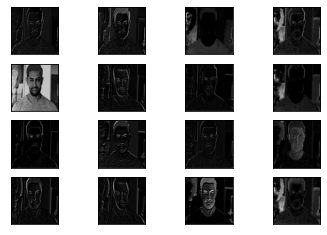

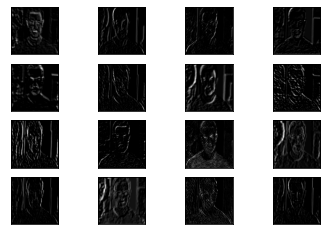

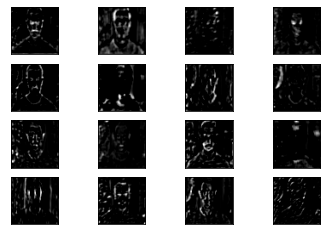

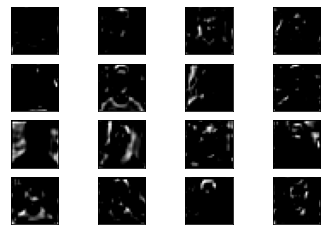

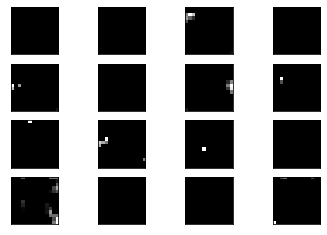

In [25]:
for fmap in features_maps:
    ix=1
    for _ in range(square):
        for _ in range(square):
            ax=pyplot.subplot(square,square,ix)
            ax.set_xticks([])
            ax.set_yticks([])
            pyplot.imshow(fmap[0,:,:,ix-1],cmap='gray')
            ix+=1
    pyplot.show()

## Other Method

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


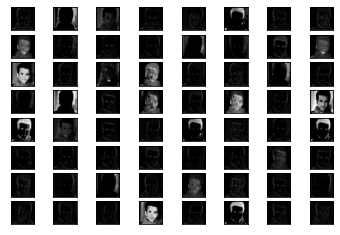

In [26]:
# plot feature map of first conv layer for given image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
print(model.summary())
# load the image with the required shape
img = load_img('/Users/aishaandatt/Downloads/IBM/Tusshar_Kapoor.jpeg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1],cmap='gray')
        arr1=feature_maps[0,:,:,ix-1]
        ix += 1
# show the figure
pyplot.show()

In [27]:
arr1

array([[  0.       ,   0.       ,   0.       , ..., 114.77102  ,
        116.13978  , 279.97238  ],
       [ 18.332918 ,   0.       ,   0.       , ...,   3.6144714,
          4.85347  , 269.82187  ],
       [ 15.108697 ,   0.       ,   0.       , ...,   4.2490954,
          5.2556243, 269.36703  ],
       ...,
       [ 87.41283  ,   0.       ,   0.       , ...,   0.       ,
          0.       , 267.36563  ],
       [ 84.602325 ,   0.       ,   2.3393245, ...,   0.       ,
          0.       , 258.73483  ],
       [ 41.571136 ,   0.       ,   0.       , ...,  30.270111 ,
         26.854563 , 203.76582  ]], dtype=float32)

In [28]:
arr1.ndim

2

In [29]:
len(arr1)

224

In [30]:
import matplotlib.pyplot as plt

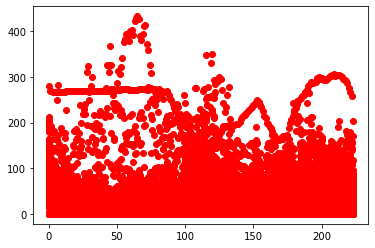

In [31]:
plt.plot(arr1,'ro')
plt.show()

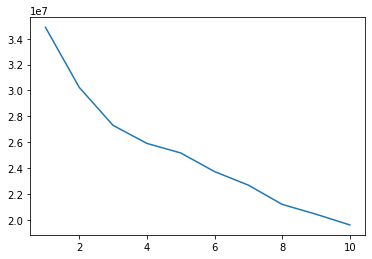

In [32]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(arr1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.show()

In [33]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(arr1)

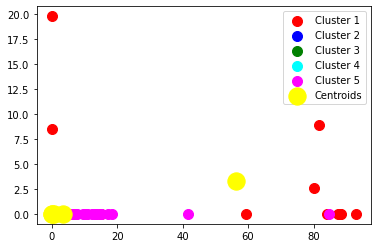

In [34]:
plt.scatter(arr1[y_kmeans == 0, 0], arr1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(arr1[y_kmeans == 1, 0], arr1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(arr1[y_kmeans == 2, 0], arr1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(arr1[y_kmeans == 3, 0], arr1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(arr1[y_kmeans == 4, 0], arr1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


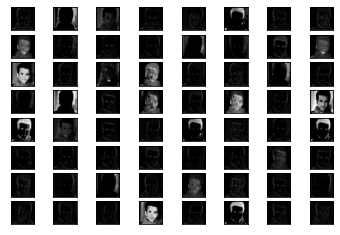

In [35]:
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
print(model.summary())
# load the image with the required shape
img = load_img('Tusshar_Kapoor.jpeg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1],cmap='gray')
        arr2=feature_maps[0,:,:,ix-1]
        ix += 1
# show the figure
pyplot.show()

In [36]:
arr2

array([[  0.       ,   0.       ,   0.       , ..., 114.77102  ,
        116.13978  , 279.97238  ],
       [ 18.332918 ,   0.       ,   0.       , ...,   3.6144714,
          4.85347  , 269.82187  ],
       [ 15.108697 ,   0.       ,   0.       , ...,   4.2490954,
          5.2556243, 269.36703  ],
       ...,
       [ 87.41283  ,   0.       ,   0.       , ...,   0.       ,
          0.       , 267.36563  ],
       [ 84.602325 ,   0.       ,   2.3393245, ...,   0.       ,
          0.       , 258.73483  ],
       [ 41.571136 ,   0.       ,   0.       , ...,  30.270111 ,
         26.854563 , 203.76582  ]], dtype=float32)

K Means __Prayag__

In [53]:
arr2.size

50176

In [52]:
arr2.ndim

2

In [51]:
arr2.shape

(224, 224)